# EDA of the labeled dataset + storing the labeled data in the format from [InstructABSA](https://github.com/kevinscaria/InstructABSA.git)


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
import os
from collections import defaultdict

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

from sklearn.model_selection import train_test_split

[nltk_data] Downloading package vader_lexicon to /home/sc.uni-
[nltk_data]     leipzig.de/ch31qoni/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read review CSV
patient_review_df = pd.read_csv("data/sentence_data/labeling/patient_review_labels_labeled.csv", sep=";")
anonym = False

r, c = patient_review_df.shape
print(f"The review data has {r} rows and {c} columns")

The review data has 5175 rows and 7 columns


In [ ]:
# Number of unique review bodys
patient_review_df["review_id"].nunique()

481

In [ ]:
# Number of unique sentences
patient_review_df["sentence"].nunique()

4671

In [52]:
#Polariry/setiment distribution per Aspect Category in percent
(patient_review_df.groupby('AspectCategory')['polarity'].value_counts(normalize=True).mul(100).unstack().round(2))

polarity,negativ,neutral,positiv
AspectCategory,,,
Allgemein,50.00,14.04,35.96
Arzt,28.23,17.74,54.03
Krankenhaus,32.91,34.82,32.27
Personal,30.00,7.27,62.73
Pflegepersonal,23.18,6.62,70.20
anderer Service,42.62,14.21,43.17
mediz. Service,25.00,35.57,39.43


In [ ]:
def get_sentiment(data, name):
    print(f"Aspect category distribution after labeling for {name}: \n", data["AspectCategory"].value_counts())
    print(f"Total Number of Aspect Terms for {name}: ", data["AspectCategory"].value_counts().sum())
    print(f"Polarity/sentiment distribution after labeling for {name}: \n", data["polarity"].value_counts())
    print(f"Polariry/sentiment distribution per Aspect Category for {name}: \n", data.groupby('AspectCategory')['polarity'].value_counts().unstack())
    

In [64]:
get_sentiment(patient_review_df, "Complete Dataset")

Aspect category distribution after labeling for Complete Dataset: 
 AspectCategory
mediz. Service     388
Krankenhaus        313
Arzt               248
anderer Service    183
Pflegepersonal     151
Allgemein          114
Personal           110
Name: count, dtype: int64
Total Number of Aspect Terms for Complete Dataset:  1507
Polarity/sentiment distribution after labeling for Complete Dataset: 
 polarity
positiv    683
negativ    473
neutral    351
Name: count, dtype: int64
Polariry/setiment distribution per Aspect Category for Complete Dataset: 
 polarity         negativ  neutral  positiv
AspectCategory                            
Allgemein             57       16       41
Arzt                  70       44      134
Krankenhaus          103      109      101
Personal              33        8       69
Pflegepersonal        35       10      106
anderer Service       78       26       79
mediz. Service        97      138      153


In [ ]:
# Delete the 'from' and 'to' column
patient_review_df = patient_review_df.drop('from', axis=1)
patient_review_df = patient_review_df.drop('to', axis=1)
patient_review_df

,reviewID,sentence,AspectCategory,AspectTerm,polarity
0,10,Ich bin heute hier angekommen.,Allgemein,NaN,neutral
1,10,Ärzte und Pflegepersonal ist in Ordnung.,Arzt,Ärzte,positiv
2,10,Ärzte und Pflegepersonal ist in Ordnung.,Pflegepersonal,Pflegepersonal,positiv
3,10,Was hier nicht stimmt ist die Sauberkeit und O...,Krankenhaus,Zimmer,negativ
4,10,Was hier nicht stimmt ist die Sauberkeit und O...,Krankenhaus,Sauberkeit,negativ
...,...,...,...,...,...
5170,4860,Mein nachträglicher Dank an dieser Stelle alle...,Pflegepersonal,Pflegepersonal,positiv
5171,4860,Die einfache Zweibettzimmerausstattung (Altgeb...,Krankenhaus,Zweibettzimmerausstattung,positiv
5172,4860,Die einfache Zweibettzimmerausstattung (Altgeb...,Arzt,ärztlichen,positiv
5173,4860,Die einfache Zweibettzimmerausstattung (Altgeb...,anderer Service,pflegenden Leistungen,positiv


In [ ]:
# Function to find the position of the AspectTerm in the Sentence
def calculate_positions(row):
    if pd.notna(row['AspectTerm']):  # Check if AspectTerm is not NaN
        sentence = row['sentence']
        aspect_term = row['AspectTerm']
        
        # Find the start and end positions of the AspectTerm
        try:
            start = sentence.index(aspect_term)
            end = start + len(aspect_term) - 1
            return pd.Series([start, end])
        except ValueError:
            # If AspectTerm is not found in Sentence, return None
            return pd.Series([None, None])
    else:
        return pd.Series([None, None])

# Apply the function and add new columns
patient_review_df[['from', 'to']] = patient_review_df.apply(calculate_positions, axis=1)

# Save the updated DataFrame
if anonym == True:
    patient_review_df.to_csv("data/sentence_data/labeling/patient_review_labels_anonym.csv", index=False, quoting=1, sep=";")
else:
    patient_review_df.to_csv("data/sentence_data/labeling/patient_review_labels_labeled.csv", index=False, quoting=1, sep=";")

# Display the updated DataFrame
patient_review_df


,reviewID,sentence,AspectCategory,AspectTerm,polarity,from,to
0,10,Ich bin heute hier angekommen.,Allgemein,NaN,neutral,NaN,NaN
1,10,Ärzte und Pflegepersonal ist in Ordnung.,Arzt,Ärzte,positiv,0.0,4.0
2,10,Ärzte und Pflegepersonal ist in Ordnung.,Pflegepersonal,Pflegepersonal,positiv,10.0,23.0
3,10,Was hier nicht stimmt ist die Sauberkeit und O...,Krankenhaus,Zimmer,negativ,56.0,61.0
4,10,Was hier nicht stimmt ist die Sauberkeit und O...,Krankenhaus,Sauberkeit,negativ,30.0,39.0
...,...,...,...,...,...,...,...
5170,4860,Mein nachträglicher Dank an dieser Stelle alle...,Pflegepersonal,Pflegepersonal,positiv,74.0,87.0
5171,4860,Die einfache Zweibettzimmerausstattung (Altgeb...,Krankenhaus,Zweibettzimmerausstattung,positiv,13.0,37.0
5172,4860,Die einfache Zweibettzimmerausstattung (Altgeb...,Arzt,ärztlichen,positiv,165.0,174.0
5173,4860,Die einfache Zweibettzimmerausstattung (Altgeb...,anderer Service,pflegenden Leistungen,positiv,180.0,200.0


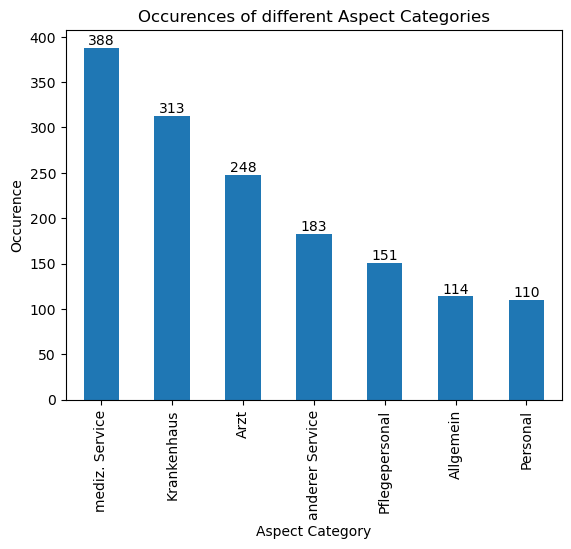

In [28]:
aspect_category = patient_review_df['AspectCategory'].value_counts()
bars = aspect_category.plot(kind='bar')
plt.title('Occurences of different Aspect Categories')
plt.ylabel('Occurence')
plt.xlabel('Aspect Category')
#plt.xticks([0, 1], ['Yes', 'No'], rotation=0)
# Annotate each bar with the count number
for bar in bars.patches:
    bars.annotate(str(bar.get_height()), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=10)
plt.show()

### Prepare data for format of [InstructABSA](https://github.com/kevinscaria/InstructABSA.git)

#### Dataset Requirements from [InstructABSA](https://github.com/kevinscaria/InstructABSA.git)
This section describes the format of the data required for the training and evaluation of the datasets using our approach. For all subtasks, the field names should match exactly as shown and have the same datatypes. The fields to be present in the raw dataset are as follows:

-- ```raw_text```: This is the reviews section (str)

-- ```aspectTerms```: This is the set of aspect terms and their polarities to be present as a list of dictionaries. Each dictionary will have atleast two keys with the one of the key ```term``` and the value which is an aspect in the corresponding sentence. The second key will be ```polarity``` and its value is the polarity for corresponding aspect. (```[{'term':'aspect1', 'polarity':'polarity1'}, ...]```)

>**Warning**
>When creating the dataset in this fashion and saving it, ```.xlsx/.csv``` format will convert the aspectTerms column into ```string/text``` format. But the package will handle that when loading the dataset file. 

An example dataset is shown below:

| raw_text  | aspectTerms |
| ------------- | ------------- |
| The cab ride was amazing but the service was pricey  | [{'term':'cab ride', 'polarity':'positive'}, {'term':'service', 'polarity':'negative'}]  |
| I ordered the Barbeque Pizza | [{'term':'noAspectTerm', 'polarity':'none'}] |

In [ ]:
def merge_sentences(input_data):
    """
    Merges duplicate sentences (identified by review_id + sentence_id) into single entries,
    combining their aspect terms and categories while preserving polarity alignment.

    Args:
        input_data (list[dict]): List of sentence entries, where each entry contains:
            - review_id (str/int): Unique identifier for the review.
            - sentence_id (int): Unique identifier for the sentence.
            - raw_text (str): The actual sentence text.
            - aspectTerms (list[dict]): Aspect terms with 'term' and 'polarity' keys.
            - aspectCategories (list[dict]): Aspect categories with 'category' and 'polarity' keys.

    Returns:
        list[dict]: Merged data with no duplicate sentences. Each entry contains:
            - Combined aspectTerms/aspectCategories lists from all duplicates.
            - Polarity of categories matches their corresponding terms.
    """
    # Dictionary to merge sentences by sentence_id
    merged_data = {}

    for entry in input_data:
        review_id = entry["review_id"]
        sentence_id = entry["sentence_id"]
        raw_text = entry["raw_text"]
        aspect_terms = entry["aspectTerms"]
        aspect_categories = entry["aspectCategories"]

        # Create a unique key using review_id and sentence_id
        key = (review_id, sentence_id)

        if key not in merged_data:
            # Initialize a new merged entry
            merged_data[key] = {
                "review_id": review_id,
                "sentence_id": sentence_id,
                "raw_text": raw_text,
                "aspectTerms": [],
                "aspectCategories": []
            }

        # Append the aspect terms and categories to the existing entry
        for term in aspect_terms:
            merged_data[key]["aspectTerms"].append(term)

        for category, term in zip(aspect_categories, aspect_terms):
            # Assign the same polarity to categories as their corresponding terms
            category["polarity"] = term["polarity"]
            merged_data[key]["aspectCategories"].append(category)

    # Convert the merged data back to a list
    return list(merged_data.values())


global sentence id -> output saved as one file

ONLY USE WHEN FULLY LABELED DATASET IS AVAILABLE!

In [ ]:
def process_data(input_file, output_file):
    """
    Processes a CSV file of review sentences into structured aspect-based data,
    assigns unique sentence IDs, merges duplicates, and saves as JSON/CSV.

    Args:
        input_file (str): Path to input CSV file with columns:
            - review_id: Unique review identifier.
            - sentence: Raw text of the sentence.
            - AspectTerm: Aspect term (e.g., "nurse").
            - AspectCategory: Aspect category (e.g., "staff").
            - polarity: Sentiment polarity ("positive"/"neutral"/"negative").
        output_file (str): Output file path (.json or .csv extension determines format).

    Returns:
        None: Saves processed data to the specified output file.

    Raises:
        ValueError: If output_file extension is not .json or .csv.
    """
    # Read the CSV data
    df = pd.read_csv(input_file, delimiter=";")

    # List to store output data
    output_data = []

    # Dictionary to map sentence contents to their assigned sentence IDs (for uniqueness)
    sentence_map = {}

    global global_sentence_id  # Use the global sentence ID counter

    # Iterate over each row in the dataframe
    for _, row in df.iterrows():
        review_id = row['review_id']
        sentence = row['sentence']
        aspect_term = row['AspectTerm']
        aspect_category = row['AspectCategory']
        polarity = row['polarity']

        # Check if the sentence has already been processed and assigned an ID
        if sentence not in sentence_map:
            sentence_map[sentence] = global_sentence_id
            global_sentence_id += 1  # Increment the global sentence ID counter
        
        # Get the assigned sentence ID
        sentence_id = sentence_map[sentence]
        
        # Format the aspect terms and categories into the required JSON format
        aspect_terms = [{'term': aspect_term, 'polarity': polarity}] if aspect_term else [{'term': 'noAspectTerm', 'polarity': 'none'}]
        aspect_categories = [{'category': aspect_category, 'polarity': 'none'}] if aspect_category else [{'category': 'noAspectCategory', 'polarity': 'none'}]
        
        # Append the processed row to the output data
        output_data.append({
            "review_id": review_id,
            'sentence_id': sentence_id,
            'raw_text': sentence,
            'aspectTerms': aspect_terms,  # Directly use the list of dictionaries
            'aspectCategories': aspect_categories  # Directly use the list of dictionaries
        })
    
    output_data = merge_sentences(output_data)
    
    # Check the file extension and save as either CSV or JSON
    file_extension = os.path.splitext(output_file)[1].lower()

    if file_extension == '.json':
        # Save as JSON
        with open(output_file, 'w', encoding='utf-8') as f:
            json.dump(output_data, f, ensure_ascii=False, indent=4)
    elif file_extension == '.csv':
        # Convert to a DataFrame and save as CSV
        output_df = pd.DataFrame(output_data)
        output_df.to_csv(output_file, index=False, quoting=1)  # quoting=1 to ensure proper CSV formatting
    else:
        raise ValueError("Unsupported file extension. Please use .csv or .json.")
    
    print(f"Data transformed and saved to {output_file}")

In [ ]:
# Initialize global counter for sentence IDs
global_sentence_id = 1

In [ ]:
if anonym == True:
    input_file = "./data/sentence_data/labeling/patient_review_labels_anonym.csv"
    output_file = "./data/hospitalABSA/patient_review_labels_absa_ano.json"
else:
    input_file = "./data/sentence_data/labeling/patient_review_labels_labeled.csv"
    output_file = "./data/hospitalABSA/patient_review_labels_absa.json"
# Example usage
process_data(input_file, output_file)

if anonym == True:
    input_file = "./data/sentence_data/labeling/patient_review_labels_anonym.csv"
    output_file = "./data/hospitalABSA/patient_review_labels_absa_ano.csv"
else:
    input_file = "./data/sentence_data/labeling/patient_review_labels_labeled.csv"
    output_file = "./data/hospitalABSA/patient_review_labels_absa.csv"
# Example usage
process_data(input_file, output_file)

Data transformed and saved to .\data\sentence_data\labeling\patient_review_labels_absa_ano.json
Data transformed and saved to .\data\sentence_data\labeling\patient_review_labels_absa_ano.csv


save the outputfile as two datasets for the labeled and the unlabled data

Use when data is only partially labeled!

In [ ]:
def process_data2(input_file, labeled_output_file, unlabeled_output_file):
    """
    Processes a CSV file of reviews, separates labeled/unlabeled sentences, assigns unique IDs,
    and saves results to separate JSON/CSV files.

    Args:
        input_file (str): Path to input CSV file with columns:
            - review_id: Unique review identifier
            - sentence: Text content
            - AspectTerm: Term being evaluated (may be NaN)
            - AspectCategory: Category of term (may be NaN)
            - polarity: Sentiment polarity
        labeled_output_file (str): Output path for labeled sentences (.json or .csv)
        unlabeled_output_file (str): Output path for unlabeled sentences (.json or .csv)

    Returns:
        None: Saves two output files (labeled and unlabeled data)

    Raises:
        ValueError: If output file extensions are not .json or .csv
    """
    # Read the CSV data
    df = pd.read_csv(input_file, delimiter=";")

    # Lists to store labeled and unlabeled data
    labeled_data = []
    unlabeled_data = []

    # Dictionary to map sentence contents to their assigned sentence IDs (for uniqueness)
    sentence_map = {}

    global global_sentence_id  # Use the global sentence ID counter

    # Iterate over each row in the dataframe
    for _, row in df.iterrows():
        review_id = row['review_id']
        sentence = row['sentence']
        aspect_term = row['AspectTerm']
        aspect_category = row['AspectCategory']
        polarity = row['polarity']

        # Check if the sentence has already been processed and assigned an ID
        if sentence not in sentence_map:
            sentence_map[sentence] = global_sentence_id
            global_sentence_id += 1  # Increment the global sentence ID counter
        
        # Get the assigned sentence ID
        sentence_id = sentence_map[sentence]
        
        # Format the aspect terms and categories into the required JSON format
        if pd.isna(aspect_term) and pd.isna(aspect_category):
            # If aspectTerm and aspectCategory are both NaN, it's an unlabeled sentence
            unlabeled_data.append({
                "review_id": review_id,
                'sentence_id': sentence_id,
                'raw_text': sentence,
                'aspectTerms': [{'term': None, 'polarity': None}],
                'aspectCategories': [{'category': None, 'polarity': None}]
            })
            continue  # Skip further processing for this sentence
        
        # Replace NaN term with 'noAspectTerm' but keep the same polarity for the aspect term
        if pd.isna(aspect_term):
            aspect_term = 'noAspectTerm'
            aspect_polarity = polarity  # Retain the polarity of the aspect term
            
        else:
            aspect_polarity = polarity  # Keep original polarity if aspect_term is not NaN

        if pd.isna(aspect_category):
            aspect_category = 'noaApectCategory'
            category_polarity = aspect_polarity  # Use the aspect term's polarity for the category
        else:
            category_polarity = polarity  # If aspect_category exists, retain its polarity
        
        # Construct the list of aspect terms and categories with appropriate polarities
        aspect_terms = [{'term': aspect_term, 'polarity': aspect_polarity}]
        aspect_categories = [{'category': aspect_category, 'polarity': category_polarity}]
        
        # Append the processed row to the labeled data
        labeled_data.append({
            "review_id": review_id,
            'sentence_id': sentence_id,
            'raw_text': sentence,
            'aspectTerms': aspect_terms,  # Directly use the list of dictionaries
            'aspectCategories': aspect_categories  # Directly use the list of dictionaries
        })
    
    # Merge sentences and handle multiple aspect terms per sentence for labeled data
    labeled_data = merge_sentences(labeled_data)

    # Check the file extension and save as either CSV or JSON for labeled and unlabeled
    labeled_file_extension = os.path.splitext(labeled_output_file)[1].lower()
    unlabeled_file_extension = os.path.splitext(unlabeled_output_file)[1].lower()

    # Save labeled data
    if labeled_file_extension == '.json':
        with open(labeled_output_file, 'w', encoding='utf-8') as f:
            json.dump(labeled_data, f, ensure_ascii=False, indent=4)
    elif labeled_file_extension == '.csv':
        labeled_df = pd.DataFrame(labeled_data)
        labeled_df.to_csv(labeled_output_file, index=False, quoting=1)  # quoting=1 to ensure proper CSV formatting
    else:
        raise ValueError("Unsupported file extension for labeled data. Please use .csv or .json.")

    # Save unlabeled data
    if unlabeled_file_extension == '.json':
        with open(unlabeled_output_file, 'w', encoding='utf-8') as f:
            json.dump(unlabeled_data, f, ensure_ascii=False, indent=4)
    elif unlabeled_file_extension == '.csv':
        unlabeled_df = pd.DataFrame(unlabeled_data)
        unlabeled_df.to_csv(unlabeled_output_file, index=False, quoting=1)  # quoting=1 to ensure proper CSV formatting
    else:
        raise ValueError("Unsupported file extension for unlabeled data. Please use .csv or .json.")
    
    print(f"Labeled data saved to {labeled_output_file}")
    print(f"Unlabeled data saved to {unlabeled_output_file}")

In [ ]:
# Initialize global counter for sentence IDs
global_sentence_id = 1

In [ ]:
if anonym == True:
    input_file = "./data/sentence_data/labeling/patient_review_labels_anonym.csv"
    output_file_labeled = "./data/hospitalABSA/patient_review_labels_absa_ano.json"
    output_file_unlabeled = "./data/hospitalABSA/patient_review_labels_absa_ano_unlabled.json"
    process_data2(input_file, output_file_labeled, output_file_unlabeled)

    output_file_labeled = "./data/hospitalABSA/patient_review_labels_absa_ano.csv"
    output_file_unlabeled = "./data/hospitalABSA/patient_review_labels_absa_ano_unlabled.csv"
    process_data2(input_file, output_file_labeled, output_file_unlabeled)

else:
    input_file = "./data/sentence_data/labeling/patient_review_labels_labeled.csv"
    output_file_labeled = "./data/hospitalABSA/patient_review_labels_absa.json"
    output_file_unlabeled = "./data/hospitalABSA/patient_review_labels_absa_unlabled.json"
    process_data2(input_file, output_file_labeled, output_file_unlabeled)

    output_file_labeled = "./data/hospitalABSA/patient_review_labels_absa.csv"
    output_file_unlabeled = "./data/hospitalABSA/patient_review_labels_absa_unlabled.csv"
    process_data2(input_file, output_file_labeled, output_file_unlabeled)

Labeled data saved to .\data\sentence_data\labeling\patient_review_labels_absa_ano.json
Unlabeled data saved to .\data\sentence_data\labeling\patient_review_labels_absa_ano_unlabled.json
Labeled data saved to .\data\sentence_data\labeling\patient_review_labels_absa_ano.csv
Unlabeled data saved to .\data\sentence_data\labeling\patient_review_labels_absa_ano_unlabled.csv


###  analysis

In [ ]:
patient_sentence_df = pd.read_csv("data/hospitalABSA/patient_review_labels_absa.csv")
# Convert aspectTerms and aspectCategories from string to list of dicts
patient_sentence_df['aspectTerms'] = patient_sentence_df['aspectTerms'].apply(ast.literal_eval)
patient_sentence_df['aspectCategories'] = patient_sentence_df['aspectCategories'].apply(ast.literal_eval)

In [6]:
patient_sentence_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         1011 non-null   float64
 1   sentenceId        1011 non-null   int64  
 2   raw_text          1011 non-null   object 
 3   aspectTerms       1011 non-null   object 
 4   aspectCategories  1011 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.6+ KB


In [3]:
# Number of different reviews in labelled dataset
patient_sentence_df["review_id"].nunique()

202

In [4]:
# Number of different sentences in labelled dataset
patient_sentence_df["sentence_id"].nunique()

1010

In [ ]:
# Reviews with most sentences
patient_sentence_df["review_id"].value_counts()

review_id
13.0     25
309.0    23
15.0     21
18.0     18
22.0     17
         ..
97.0      1
5.0       1
437.0     1
92.0      1
183.0     1
Name: count, Length: 202, dtype: int64

In [71]:
# First, split 80% for training and 20% for temporary (validation + test)
train_data, temp_data = train_test_split(patient_sentence_df, test_size=0.2, random_state=42)
# Then split the temporary set into 50% validation and 50% test (10% each of the original data)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [74]:
def evaluate_data(data, name):
    print(f"Number of different reviews in {name}: ", data["review_id"].nunique())
    print(f"Number of different sentences in {name}: ",data["sentence_id"].nunique())

    # aspectTerms and aspectCategories is list of dictionaries -> count number of terms per sentence by taking length of list
    # Count number of terms per sentence (excluding 'noAspectTerm')
    data['num_aspects'] = data['aspectTerms'].apply(
        lambda x: sum(1 for term in x if term.get('term', '').lower() != 'noAspectTerm'))
    data['num_categories'] = data['aspectCategories'].apply(len)
    print(f"\nTotal number of Aspect Terms in {name}: ", data['num_aspects'].sum())

    # --- Count 'noAspectTerm' occurrences ---
    no_aspect_count = data['aspectTerms'].apply(
        lambda x: sum(1 for term in x if term.get('term', '').lower() == 'noAspectTerm')).sum()
    print(f"\nNumber of 'noAspectTerm' occurrences in {name}: {no_aspect_count}")

    #Aspect distribution per sentence
    aspect_distribution = data['num_aspects'].value_counts().sort_index()
    print(f"\nAspect distribution per sentence for {name}:")
    print(aspect_distribution)

    #Category distribution per sentence
    category_distribution = data['num_categories'].value_counts().sort_index()
    print(f"\nCategory distribution per sentence for {name}:")
    print(category_distribution)

    # --- NEW: Sentiment Analysis ---
    # Extract all polarities from aspectTerms
    all_polarities = []
    for terms in data['aspectTerms']:
        for term in terms:
            if term.get('term', '').lower():
                all_polarities.append(term.get('polarity', 'unknown'))

    # Extract all AspectCategories (flatten the list of lists)
    all_categories = []
    for categories in data['aspectCategories']:
        for cat in categories:
            all_categories.append(cat.get('category', 'unknown'))

    # Convert to Series for analysis
    polarities_series = pd.Series(all_polarities)
    categories_series = pd.Series(all_categories)

    print("\n--- Sentiment Analysis ---")
    print(f"\nAspect category distribution for {name}:")
    print(categories_series.value_counts())

    print(f"\nTotal number of aspect terms (with polarity) for {name}: {len(polarities_series)}")
    
    print(f"\nPolarity distribution for {name}:")
    print(polarities_series.value_counts())

    print(f"\nPolarity distribution per Aspect Category for {name}:")
    sentiment_by_category = pd.DataFrame({
        'AspectCategory': all_categories,
        'polarity': all_polarities
    })
    print(sentiment_by_category.groupby('AspectCategory')['polarity'].value_counts().unstack())

    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x='num_aspects', data=data)
    plt.title(f"Number of Aspects per Sentence for {name}")
    plt.xlabel("Number of Aspects")
    plt.ylabel("Count")

    # Add counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.0f}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            xytext=(0, 5), 
            textcoords='offset points',
            fontsize=10
        )

    plt.show()
    

Number of different reviews in Complete Dataset:  202
Number of different sentences in Complete Dataset:  1010

Total number of Aspect Terms in Complete Dataset:  1393

Number of 'noaspectterm' occurrences in Complete Dataset: 114

Aspect distribution per sentence for Complete Dataset:
num_aspects
0    114
1    567
2    216
3     86
4     13
5      8
6      5
7      2
Name: count, dtype: int64

Category distribution per sentence for Complete Dataset:
num_categories
1    681
2    216
3     86
4     13
5      8
6      5
7      2
Name: count, dtype: int64

--- Sentiment Analysis ---

Aspect category distribution for Complete Dataset:
mediz. Service     388
Krankenhaus        313
Arzt               248
anderer Service    183
Pflegepersonal     151
Allgemein          114
Personal           110
Name: count, dtype: int64

Total number of aspect terms (with polarity) for Complete Dataset: 1507

Polarity distribution for Complete Dataset:
positiv    683
negativ    473
neutral    351
Name: count

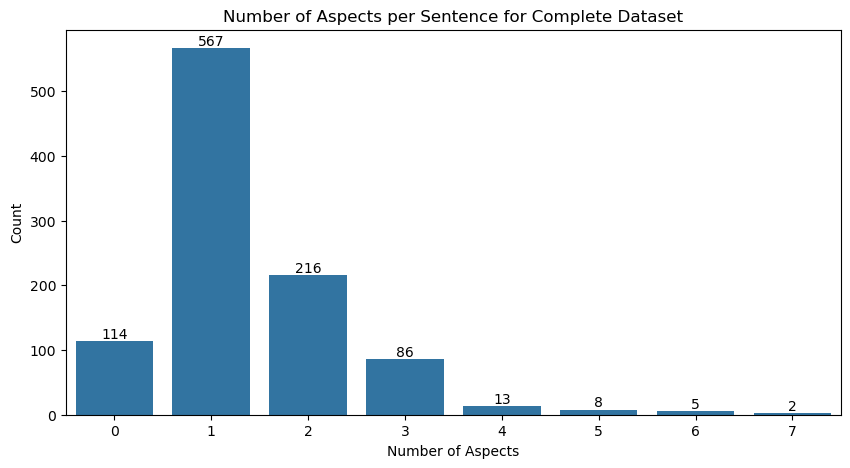

In [75]:
evaluate_data(patient_sentence_df, "Complete Dataset")

Number of different reviews in Training Dataset:  195
Number of different sentences in Training Dataset:  807

Total number of Aspect Terms in Training Dataset:  1111

Number of 'noaspectterm' occurrences in Training Dataset: 90

Aspect distribution per sentence for Training Dataset:
num_aspects
0     90
1    455
2    172
3     69
4     11
5      6
6      4
7      1
Name: count, dtype: int64

Category distribution per sentence for Training Dataset:
num_categories
1    545
2    172
3     69
4     11
5      6
6      4
7      1
Name: count, dtype: int64

--- Sentiment Analysis ---

Aspect category distribution for Training Dataset:
mediz. Service     313
Krankenhaus        240
Arzt               200
anderer Service    142
Pflegepersonal     125
Personal            91
Allgemein           90
Name: count, dtype: int64

Total number of aspect terms (with polarity) for Training Dataset: 1201

Polarity distribution for Training Dataset:
positiv    533
negativ    382
neutral    286
Name: count, 

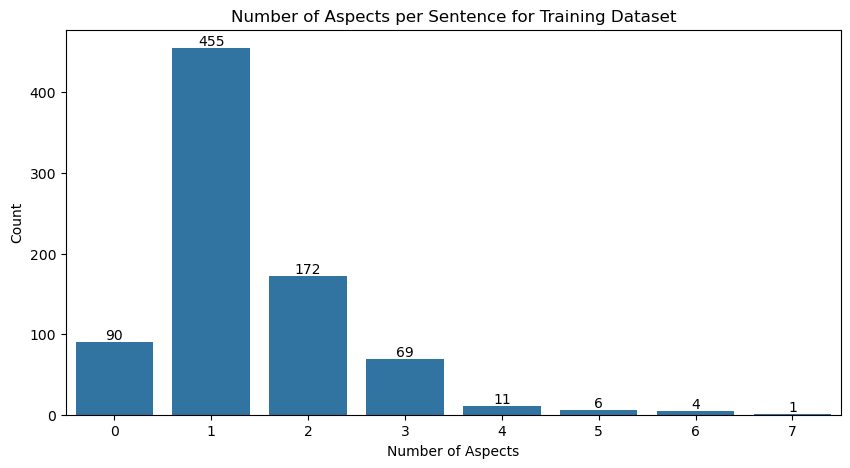

In [76]:
evaluate_data(train_data, "Training Dataset")

Number of different reviews in Validation Dataset:  73
Number of different sentences in Validation Dataset:  101

Total number of Aspect Terms in Validation Dataset:  129

Number of 'noaspectterm' occurrences in Validation Dataset: 12

Aspect distribution per sentence for Validation Dataset:
num_aspects
0    12
1    63
2    18
3     5
4     1
5     1
6     1
Name: count, dtype: int64

Category distribution per sentence for Validation Dataset:
num_categories
1    75
2    18
3     5
4     1
5     1
6     1
Name: count, dtype: int64

--- Sentiment Analysis ---

Aspect category distribution for Validation Dataset:
mediz. Service     33
Krankenhaus        28
anderer Service    24
Arzt               19
Pflegepersonal     15
Allgemein          12
Personal           10
Name: count, dtype: int64

Total number of aspect terms (with polarity) for Validation Dataset: 141

Polarity distribution for Validation Dataset:
positiv    64
negativ    47
neutral    30
Name: count, dtype: int64

Polarity dis

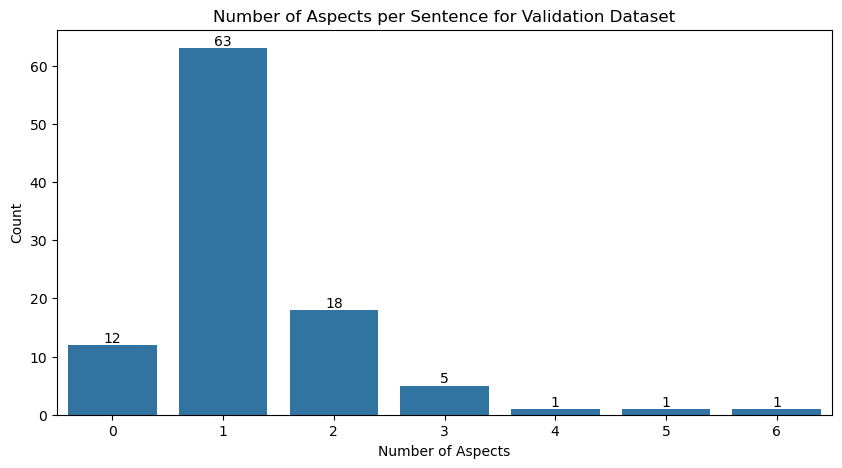

In [77]:
evaluate_data(val_data, "Validation Dataset")

Number of different reviews in Test Dataset:  69
Number of different sentences in Test Dataset:  102

Total number of Aspect Terms in Test Dataset:  153

Number of 'noaspectterm' occurrences in Test Dataset: 12

Aspect distribution per sentence for Test Dataset:
num_aspects
0    12
1    49
2    26
3    12
4     1
5     1
7     1
Name: count, dtype: int64

Category distribution per sentence for Test Dataset:
num_categories
1    61
2    26
3    12
4     1
5     1
7     1
Name: count, dtype: int64

--- Sentiment Analysis ---

Aspect category distribution for Test Dataset:
Krankenhaus        45
mediz. Service     42
Arzt               29
anderer Service    17
Allgemein          12
Pflegepersonal     11
Personal            9
Name: count, dtype: int64

Total number of aspect terms (with polarity) for Test Dataset: 165

Polarity distribution for Test Dataset:
positiv    86
negativ    44
neutral    35
Name: count, dtype: int64

Polarity distribution per Aspect Category for Test Dataset:
polari

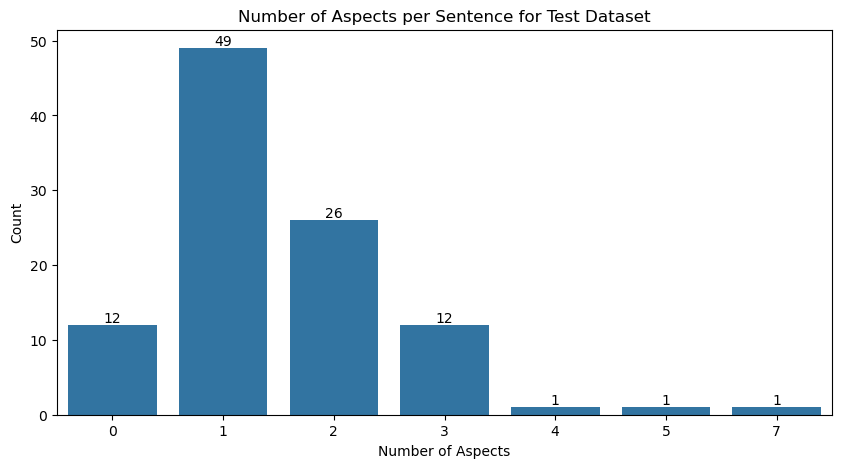

In [78]:
evaluate_data(test_data, "Test Dataset")

In [7]:
filtered_df = patient_sentence_df[
    patient_sentence_df['aspectTerms'].apply(
        lambda x: (
            sum(1 for d in x if d.get('polarity', '').lower() == 'positiv') == 2
            and sum(1 for d in x if d.get('polarity', '').lower() == 'negativ') == 1
        )
    )
]

In [9]:
filtered_df


,review_id,sentenceId,raw_text,aspectTerms,aspectCategories
261,32.0,4966,Eine Schwester stellte eine positive Ausnahme ...,"[{'term': 'Mund-Nasen-Schutz', 'polarity': 'po...","[{'category': 'anderer Service', 'polarity': '..."
936,461.0,9099,"Natürlich gibt es auch hier, wie überall, weni...","[{'term': 'Personal', 'polarity': 'negativ'}, ...","[{'category': 'Personal', 'polarity': 'negativ..."
